### Kernel Trick

Algunas veces tendremos puntos en los que el dataset no será separable a simple vista:

![](kerneltrick.png)

En este caso no existe alguna linea que separe este conjunto de puntos, sinembargo podemos manipular estos puntos de tal manera que si podamos separarlos, esta técnica se llama **kernel trick**, el cual transforma los datos en una dimensión más para darle una clara separación.

### Agregando la tercera dimensión

Debemos definir nuestra tercera variable de esta forma:

$z = x² + y²$

Al tener puntos en 3d queda graficarlos para visualizar mejor el hiperplano:

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

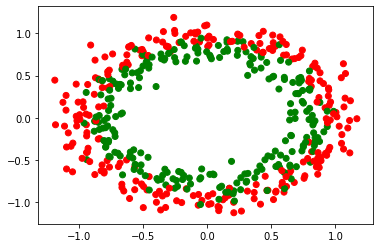

In [4]:
X, c = make_circles(n_samples=500, noise=0.09)

rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show() # 2d

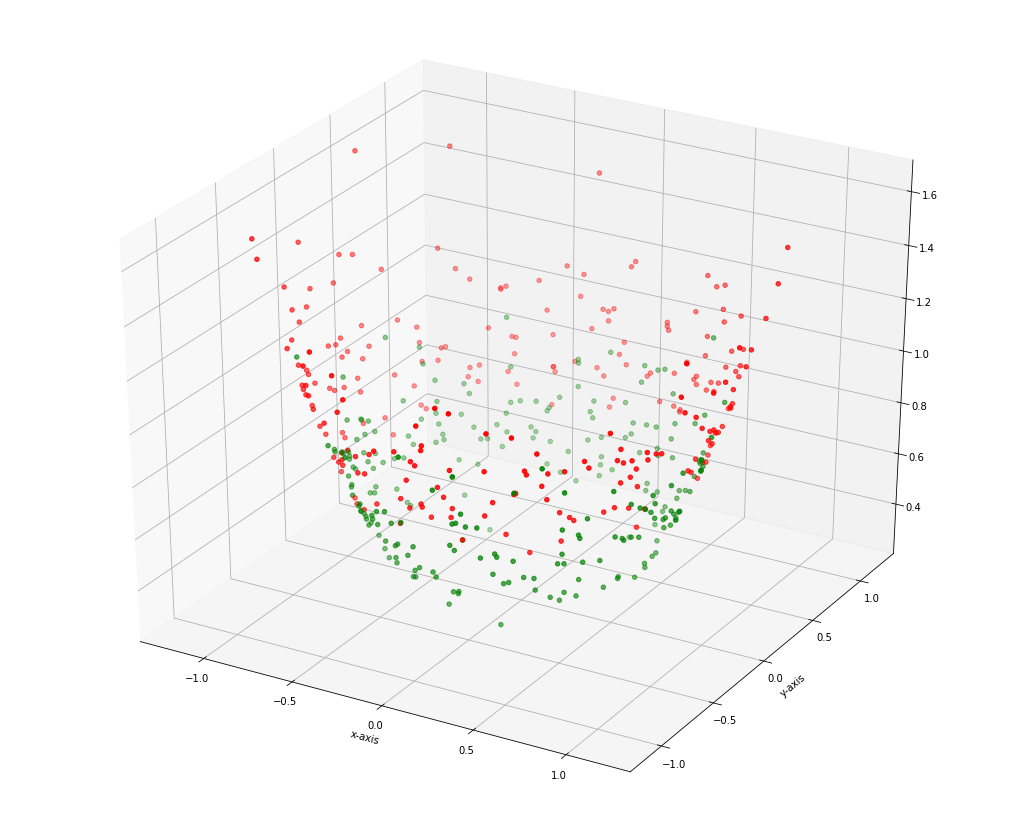

In [5]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show() # 3d

Ahora que vemos como al darle una dimension más $z = x²+y²$ tenemos puntos rojos arriba y verde abajo... podemos trazar el hiperplano !

In [9]:
# Concatenamos X (x,y) y Z en un simple ndarray
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
features

array([[-0.45506655, -0.69613946,  0.69169572],
       [ 0.87196932,  0.24017263,  0.81801339],
       [-0.80665826, -0.6535886 ,  1.07787561],
       ...,
       [-0.05360867, -1.02613608,  1.05582914],
       [-1.05102623, -0.29912271,  1.19413053],
       [-0.65316809, -0.86659648,  1.17761801]])

In [10]:
from sklearn import svm

In [11]:
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c) # features y c (clases)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Como ahora tenemos 3 variables, tendremos algo así:

$$g(x) = \vec{w}_0x_1 + \vec{w}_1x_2 + \vec{w}_2x_3 + b$$

![](svm3var.png)

$$ \vec{w}_0x_1 + \vec{w}_1x_2 + \vec{w}_2x_3 + b = 0 $$
$$ x_3 = \frac{- \vec{w}_0x_1 - \vec{w}_1x_2 -b}{\vec{w}_2}$$

Que en código sería:

In [16]:
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y) / clf.coef_[0][2]


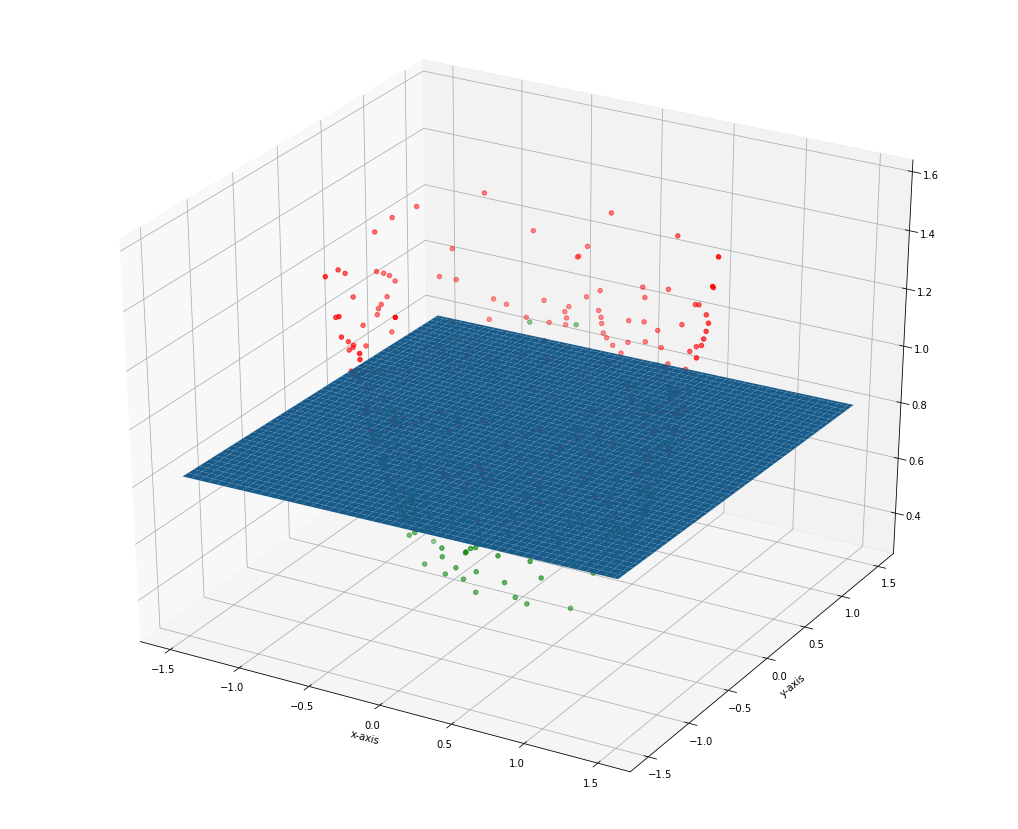

In [19]:
# ** NOTA ** : No se verá bien aqui por ser un notebook

rgb = np.array(['r', 'g'])
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")

tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y))
plt.show()

### Tipo de Kernels

Hasta este punto, solo discutimos un tipo de SVM: SVM lineal ('linear'). Como el nombre implica, SVM lineal utiliza una línea recta para separar los puntos. También se uso la técnica *kernel trick* para separa los puntos en 2 regiones claras, pero ¿Qué pasa cuando no se puede separar los puntos y la esta técnica (kernel trick) no funciona?, Es aquí donde ya no se usaran lineas o planos si no que estas se curvarán para poder separar de forma correcta.

En machine learning los kernels son funciones que llevan datos no separables linealmente a datos que si lo son:

![](kernelfunct.png)

Vamos a la práctica:

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [21]:
iris = datasets.load_iris()
print(iris.data[0:5])
print(iris.feature_names) 
print(iris.target[0:5])
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [22]:
# De todos los features anteriores solo nos quedaremos con 2
X = iris.data[:, :2]
y = iris.target

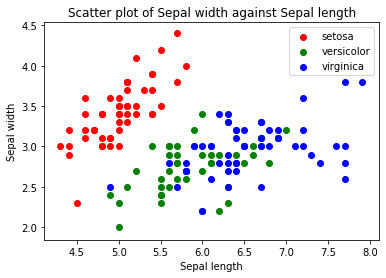

In [27]:
colors = ['red', 'green', 'blue']
#                         [('red', 0, 'setosa'), ('green', 1, 'versicolor'), ('blue', 2, 'virginica')]
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

In [33]:
C = 1 # SVM parámetro de regularización 

clf = svm.SVC(kernel='linear', C=C).fit(X, y) # kernle lineal
title = 'SVC con kernel lineal'

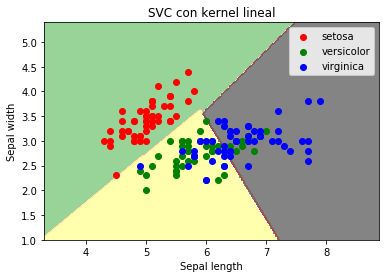

In [34]:
# máximo y minimo del primer feature
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# máximo y minimo del segundo feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# tamaño de paso de la malla
h = (x_max / x_min)/100

# haciendo predicciones para cada punto en xx,yy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# dibujando el resultado usando un color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

# dibujando los puntos de entrenamiento 
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [56]:
print('Vector de pesos (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices de support vectors= ', clf.support_) # los indices del dataset los cuales son support vectors.
# print('Support vectors = ', clf.support_vectors_)
print('Número of support vectors para cada clase = ', clf.n_support_)
#print('Coeficientes de support vector en la función de decision = ',np.abs(clf.dual_coef_))

Vector de pesos (w) =  [-2.22720466  2.24959915]
b =  4.9417851974386195
Indices de support vectors=  [  1  18  20  25  31  36  41  45  50  51  52  54  55  56  57  58  59  61
  62  63  65  66  67  68  70  71  72  73  74  75  76  77  78  82  83  84
  85  86  87  88  91  92  95  96  97  98  99 100 101 103 104 106 108 110
 111 112 113 114 115 116 119 121 123 124 126 127 128 132 133 134 136 137
 138 140 142 144 145 146 147 148 149]
Número of support vectors para cada clase =  [ 8 39 34]


In [45]:
predictions = clf.predict(X)
print(np.unique(predictions, return_counts=True)) # 50 del tipo 0 , 53 del tipo 1 , 47 del tipo 2

(array([0, 1, 2]), array([50, 53, 47]))


## C

C se conoce como el parámetro de penalización del término de error. Controla la compensación entre el límite de decisión suave y la clasificación de los puntos de entrenamiento correctos directamente Por ejemplo, si el valor de C es alto, entonces el algoritmo SVM buscará para garantizar que todos los puntos se clasifiquen correctamente.

![](highC.png)

En contraste, una C más baja apuntará al margen más amplio posible, pero dará como resultado en algunos puntos se clasifican incorrectamente.

![](lowC.png)

En resumen: Un C alto buscará clasificar todos los puntos correctamente mientra que un C bajo suaviza la superficie de decisión.

![](severalC.png)